In [1]:
# Import the dependencies 

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np



In [2]:
# Create a set of random latitude and longitude combinations. 

lats = np.random.uniform(low = -90, high = 90, size = 1500)
lngs = np.random.uniform(low = -180, high = 180, size = 1500)

lats_lngs = zip(lats, lngs)

lats_lngs



In [3]:
# Add the latitudes and longitudes to a list. 

coordinates = list(lats_lngs)


In [4]:
# Use the print function to display the latitude and longitude combinations.

for coordinate in coordinates: 
    
    print(coordinate[0], coordinate[1])
    
    

85.21130785908937 42.19452214446483
-34.81912464195097 -40.75770948153394
-81.63433243875917 97.72183406691346
-10.430408740963216 93.493623783401
-24.50798667465898 -115.6506324340302
48.60707399312207 -138.60098783880935
-8.158190481409747 159.86420820718712
70.12550143645456 26.879384077222284
37.68325295543026 157.74650212608822
3.277878559802957 16.65934335319477
4.5776120852420945 72.43151486578185
-35.842694999664936 -57.99471221694482
18.12495903637864 44.87042694582311
-19.920963442915266 -138.2102603444932
8.943891454759878 16.554625821319462
44.90989295318681 33.61681293095384
-76.04120792128997 104.927827289844
-30.646232854678345 165.8793384219028
-33.26782864054651 161.24461346404547
-64.8295810392747 -44.700154176771434
67.82490378628046 101.04854060831019
68.22962891999595 -80.77981683398995
-6.861770162125225 124.77068016641903
85.91697220407366 129.5157171806435
-50.83522908102209 -178.62991831843817
38.01073217486132 -149.96365047960876
-20.966318221191656 -28.395149

-85.18439515611647 -63.44426563558049
-11.624069215076005 139.3577278518838
-36.86688660291731 -51.19601505001313
62.45447460065867 43.36786027189183
-85.68969085498975 -153.26809678185765
-70.72043363474394 163.73205711197903
-12.060092299115126 -163.32716078519783
39.18560185918622 9.932309277043743
3.0990588544981676 -47.36068641579911
-36.22536604518301 158.06446214107245
14.856371245408582 -172.46518646520335
50.44044799002367 31.92600950616233
-6.286598785652856 172.51778000237664
29.13659717852731 -59.96554271027132
-77.05242524438411 155.25591871600835
-77.77617916881093 -84.69695527958311
-82.53619571402793 -126.009790109805
-31.401685806956685 142.9373061479621
-8.924207185141626 -132.35864431359064
-6.9358254207876655 -52.10194951045578
44.905358928030694 74.9775540766529
65.07468766005698 -33.517106505931
46.95521557276359 143.5657288203288
1.1634206792570296 -64.8447997904718
67.2232483216678 -125.55619624392926
-30.514938342141072 -14.719862930179346
-71.70809089481133 12

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding cities

cities = []

# Identify the nearest city for each latitude and longitude combination. 


for coordinate in coordinates: 
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
#  country = citypy.nearest_city(coordinate[0], coordinate[1]).country_code

# If the city is unique, add the city to the cities list. 

    if city not in cities: 
        cities.append(city)
# Print the city count to confirm sufficent count. 
len(cities)
   

    

603

In [7]:
# Import the time library and the datetime module from the datetime library

import time 
from datetime import datetime

In [2]:
# Import the requests library. 
import requests

# Import the API key. 
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [10]:



new_url = requests.get("http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38a1172def276dec71ab804c97e92225&q=nanortalik").json()
print(new_url)
print(new_url["main"]["temp"])
city_date = datetime.utcfromtimestamp(new_url["dt"]).strftime("%Y-%m-%d %H:%M:%S")
print(city_date)

{'coord': {'lon': -45.2371, 'lat': 60.1432}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 43.38, 'feels_like': 38.28, 'temp_min': 43.38, 'temp_max': 43.38, 'pressure': 1006, 'humidity': 87, 'sea_level': 1006, 'grnd_level': 1005}, 'visibility': 5085, 'wind': {'speed': 8.93, 'deg': 297, 'gust': 12.3}, 'clouds': {'all': 33}, 'dt': 1657914491, 'sys': {'country': 'GL', 'sunrise': 1657864989, 'sunset': 1657930214}, 'timezone': -7200, 'id': 3421765, 'name': 'Nanortalik', 'cod': 200}
43.38
2022-07-15 19:48:11


In [11]:
# Create an empty list to hold the weather data. 

city_data = []

#Print the beginning of the logging. 
print("Beginning Sata Retrieval     ")
print("-----------------------------")

# Create counters. 
record_count = 1
set_count = 1
 
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    
    # Group cities in sets of 50 for logging purposes. 
    if(i %50 == 0 and i >= 50): 
        set_count+= 1
        record_count += 1
        time.sleep(60)
        
    # Create endpoint URL with each city. 
    city_url = url + "&q=" + city.replace(" ", "+")
    
    
    # Log the URL, record, and set numbers and the city. 
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    record_count += 1
    
    # Run an API request for each of the cities. 
    try: 
        #Parse the JSON file and retreive data. 
        city_weather = requests.get(city_url).json()
        
        #Parse out the needed data. 
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard. 
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
        # Append the city information into city_data list. 
        city_data.append({"City": city.title(), 
                         "Lat": city_lat, 
                         "Lng": city_lng, 
                         "Max Temp": city_max_temp, 
                         "Humidity": city_humidity, 
                         "Cloudiness": city_clouds, 
                         "Wind Speed": city_wind, 
                         "Country": city_country, 
                         "Date": city_date})
# If an error is experienced, skip the city. 

    except: 
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retreival Complete      ")
print("-----------------------------")

    
    
# Loop through all the cities in our list. 
for i in range(len(cities)): 
    
    # Group cities in sets of 50 for logging purposes. 
    if (i % 50 == 0 and i >= 50): 
        set_count += 1
        record_count += 1
        time.sleep(60)
        
    # Create endpoint URL with every city. 
    city_url = url + "&q="+ cities[i]
    
    

Beginning Sata Retrieval     
-----------------------------
Processing Record 1 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 2 of Set 1 | laguna
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | bengkulu
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | sitka
Processing Record 7 of Set 1 | buala
Processing Record 8 of Set 1 | kjollefjord
Processing Record 9 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 10 of Set 1 | nola
Processing Record 11 of Set 1 | eydhafushi
Processing Record 12 of Set 1 | dolores
Processing Record 13 of Set 1 | najran
Processing Record 14 of Set 1 | benoy
Processing Record 15 of Set 1 | berehove
Processing Record 16 of Set 1 | vao
Processing Record 17 of Set 1 | port macquarie
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | tura
Processing Record 20 of Set 1 | clyde river
Processing Record 21 of Set 1 | atambua
Processing Record 22 of Set 1 | tiksi
Pro

Processing Record 189 of Set 4 | berlevag
Processing Record 190 of Set 4 | itamaraca
Processing Record 191 of Set 4 | lasa
Processing Record 192 of Set 4 | touros
Processing Record 193 of Set 4 | pilar
Processing Record 194 of Set 4 | carson city
Processing Record 195 of Set 4 | mashhad
Processing Record 196 of Set 4 | ulaanbaatar
Processing Record 197 of Set 4 | lardos
Processing Record 198 of Set 4 | acapulco
Processing Record 199 of Set 4 | ibra
Processing Record 200 of Set 4 | jiaojiang
Processing Record 201 of Set 4 | lenine
Processing Record 202 of Set 4 | menongue
Processing Record 203 of Set 4 | beyneu
Processing Record 205 of Set 5 | road town
Processing Record 206 of Set 5 | husavik
Processing Record 207 of Set 5 | nalut
Processing Record 208 of Set 5 | umm kaddadah
Processing Record 209 of Set 5 | saint stephen
Processing Record 210 of Set 5 | odweyne
Processing Record 211 of Set 5 | kaabong
Processing Record 212 of Set 5 | seoul
Processing Record 213 of Set 5 | atar
Process

Processing Record 375 of Set 8 | port moresby
Processing Record 376 of Set 8 | arlit
Processing Record 377 of Set 8 | salalah
Processing Record 378 of Set 8 | ginda
Processing Record 379 of Set 8 | sumbawa
City not found. Skipping...
Processing Record 380 of Set 8 | duliagaon
Processing Record 381 of Set 8 | wanning
Processing Record 382 of Set 8 | sebes
Processing Record 383 of Set 8 | portland
Processing Record 384 of Set 8 | buchanan
Processing Record 385 of Set 8 | tuy hoa
Processing Record 386 of Set 8 | ancud
Processing Record 387 of Set 8 | vestmannaeyjar
Processing Record 388 of Set 8 | hamilton
Processing Record 389 of Set 8 | deputatskiy
Processing Record 390 of Set 8 | colquechaca
Processing Record 391 of Set 8 | suntar
Processing Record 392 of Set 8 | saint-pierre
Processing Record 393 of Set 8 | melfi
Processing Record 394 of Set 8 | marsa matruh
Processing Record 395 of Set 8 | vila velha
Processing Record 396 of Set 8 | kavaratti
Processing Record 397 of Set 8 | hervey b

Processing Record 559 of Set 11 | jumla
Processing Record 560 of Set 11 | ust-nera
Processing Record 562 of Set 12 | lithakia
Processing Record 563 of Set 12 | scarborough
Processing Record 564 of Set 12 | santa maria
Processing Record 565 of Set 12 | sal rei
Processing Record 566 of Set 12 | kolyvan
Processing Record 567 of Set 12 | honiara
Processing Record 568 of Set 12 | adrar
Processing Record 569 of Set 12 | ouadda
Processing Record 570 of Set 12 | akropong
Processing Record 571 of Set 12 | ostrovnoy
Processing Record 572 of Set 12 | araxa
Processing Record 573 of Set 12 | port shepstone
Processing Record 574 of Set 12 | tuatapere
Processing Record 575 of Set 12 | kaeo
Processing Record 576 of Set 12 | morondava
Processing Record 577 of Set 12 | methoni
Processing Record 578 of Set 12 | high level
Processing Record 579 of Set 12 | castelldefels
Processing Record 580 of Set 12 | natal
Processing Record 581 of Set 12 | koungou
Processing Record 582 of Set 12 | sargatskoye
Processin

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame. 

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Laguna,38.4210,-121.4238,98.01,42,0,8.05,US,2022-07-15 19:48:12
1,Albany,42.6001,-73.9662,86.58,35,7,1.01,US,2022-07-15 19:48:12
2,Bengkulu,-3.8004,102.2655,75.60,89,100,3.78,ID,2022-07-15 19:46:44
3,Rikitea,-23.1203,-134.9692,68.11,77,100,7.74,PF,2022-07-15 19:46:56
4,Sitka,57.0531,-135.3300,57.09,82,100,9.22,US,2022-07-15 19:48:13
5,Buala,-8.1450,159.5921,78.31,83,76,4.85,SB,2022-07-15 19:48:14
6,Kjollefjord,70.9457,27.3465,60.62,77,0,9.22,NO,2022-07-15 19:48:14
7,Nola,40.9220,14.5329,81.32,81,0,2.62,IT,2022-07-15 19:48:15
8,Eydhafushi,5.1033,73.0708,82.31,78,68,9.51,MV,2022-07-15 19:48:16
9,Dolores,-36.3132,-57.6792,54.66,87,100,11.39,AR,2022-07-15 19:48:17


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", 
                   "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Laguna,US,2022-07-15 19:48:12,38.4210,-121.4238,98.01,42,0,8.05
1,Albany,US,2022-07-15 19:48:12,42.6001,-73.9662,86.58,35,7,1.01
2,Bengkulu,ID,2022-07-15 19:46:44,-3.8004,102.2655,75.60,89,100,3.78
3,Rikitea,PF,2022-07-15 19:46:56,-23.1203,-134.9692,68.11,77,100,7.74
4,Sitka,US,2022-07-15 19:48:13,57.0531,-135.3300,57.09,82,100,9.22
...,...,...,...,...,...,...,...,...,...
550,Pacifica,US,2022-07-15 20:01:56,37.6138,-122.4869,81.99,77,20,21.85
551,Barhi,IN,2022-07-15 20:03:33,23.9000,80.8000,79.63,82,93,2.04
552,Sokoto,NG,2022-07-15 20:04:33,13.0609,5.2390,79.45,77,100,15.99
553,Monster,NL,2022-07-15 20:04:34,52.0258,4.1750,66.97,68,56,3.44


In [14]:
# Create the output file (CSV)

output_data_file = "weather_data/cities.csv"

# Expport the city_data into a CSV.
city_data_df.to_csv(output_data_file,index_label = "City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting. 
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]



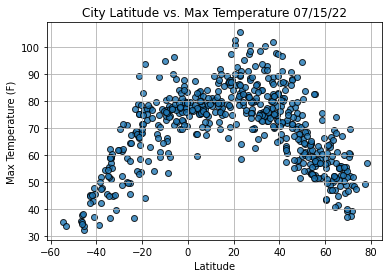

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature. 
plt.scatter(lats, max_temps, edgecolor = "black", linewidths=1, 
           marker = "o", alpha = 0.8, label = "Cities")

# Incorporate the other graph properties. 
plt.title("City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()


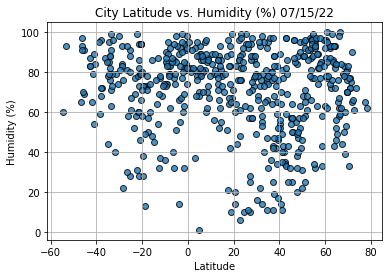

In [26]:
# Build the scatter plots for latitude vs. humidity. 

plt.scatter(lats, humidity, edgecolor = "black", linewidths =1, 
            marker = "o", alpha = 0.8, label = "Cities")

# Incorporate the other graph properties. 
plt.title(f"City Latitude vs. Humidity (%) " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure. 
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

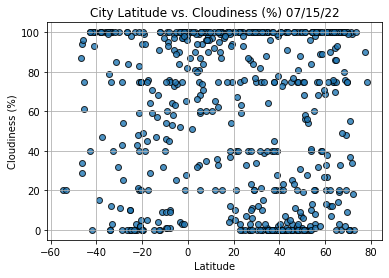

In [27]:
# Build the scatter plots for latitude vs. cloudiness. 

plt.scatter(lats, cloudiness, edgecolor = "black", linewidths =1, 
            marker = "o", alpha = 0.8, label = "Cities")

# Incorporate the other graph properties. 
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure. 
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

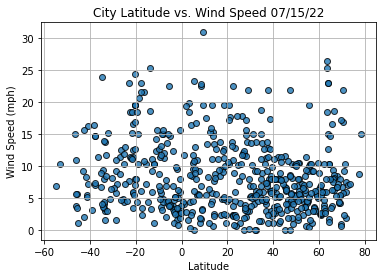

In [28]:
# Build the scatter plots for latitude vs. wind speed. 

plt.scatter(lats, wind_speed, edgecolor = "black", linewidths =1, 
            marker = "o", alpha = 0.8, label = "Cities")

# Incorporate the other graph properties. 
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure. 
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [ ]:
# # Perform linear regression. 
# (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# # Calculate the regression line "y-values" from the slope and intercept. 
# regress_values = x_values*slope+ intercept

# # Get the equation of the line. 
# line_eq = "y + "+ str(round(slope,2)) + "x + " + str(round(intercept,2))


# # Create a scatter plot of the x and y values. 
# plt.scatter(x_values, y_values)

# # Plot the regression line with the x-values and the y coordinates based on the intercept and slope. 
# plt.plot(x_values, regress_values, "r")

# # Annotate the text for the line equation and add its coordinates. 
# plt.annotate(line_eq, (10,40), fontsize=15. color="red")
# plt.title(title)
# plt.xlabel("Latitude")
# plt.ylabel("Temp")
# plt.show()























In [165]:
# Create a function to create perform linear regression on the weather data. 
# and plot a regression line and the equation with the data. 

# Import linregress
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates): 
    # Perform linear regression. 
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y-values" from the slope and intercept. 
    regress_values = x_values*slope+ intercept

    # Get the equation of the line. 
    line_eq = "y = "+ str(round(slope,2)) + "x + " + str(round(intercept,2)) + " (Correlation Coefficent): "+str(round(r_value, 2))


    # Create a scatter plot of the x and y values. 
    plt.scatter(x_values, y_values)

    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope. 
    plt.plot(x_values, regress_values, "r")

    # Annotate the text for the line equation and add its coordinates. 
    plt.annotate(line_eq, text_coordinates, fontsize=15,color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()


In [166]:
index13 = city_data_df.loc[13]
index13

City                          Vao
Country                        NC
Date          2022-07-15 19:48:19
Lat                      -22.6667
Lng                      167.4833
Max Temp                    68.99
Humidity                       58
Cloudiness                      3
Wind Speed                  18.52
Name: 13, dtype: object

In [167]:
city_data_df["Lat"] >= 0


0       True
1       True
2      False
3      False
4       True
       ...  
550     True
551     True
552     True
553     True
554     True
Name: Lat, Length: 555, dtype: bool

In [168]:
city_data_df.loc[city_data_df["Lat"] >= 0].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Laguna,US,2022-07-15 19:48:12,38.4210,-121.4238,98.01,42,0,8.05
1,Albany,US,2022-07-15 19:48:12,42.6001,-73.9662,86.58,35,7,1.01
4,Sitka,US,2022-07-15 19:48:13,57.0531,-135.3300,57.09,82,100,9.22
6,Kjollefjord,NO,2022-07-15 19:48:14,70.9457,27.3465,60.62,77,0,9.22
7,Nola,IT,2022-07-15 19:48:15,40.9220,14.5329,81.32,81,0,2.62


In [169]:
# Create Northern and Southern Hemisphere DataFrames. 

northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

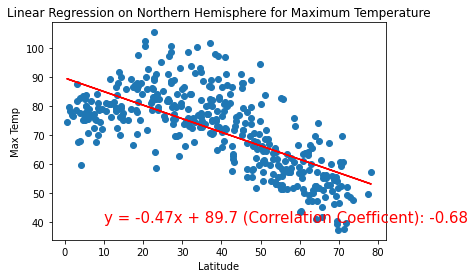

In [170]:
# Linear Regression on the Northern Hemisphere (Max Temp). 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function. 
plot_linear_regression(x_values,y_values, "Linear Regression on Northern Hemisphere \
for Maximum Temperature","Max Temp", (10,40))

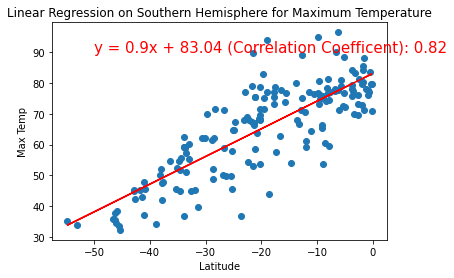

In [171]:
# Linear Regression on the Southern Hemisphere (Max Temp). 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function. 
plot_linear_regression(x_values,y_values, "Linear Regression on Southern Hemisphere \
for Maximum Temperature","Max Temp", (-50,90))

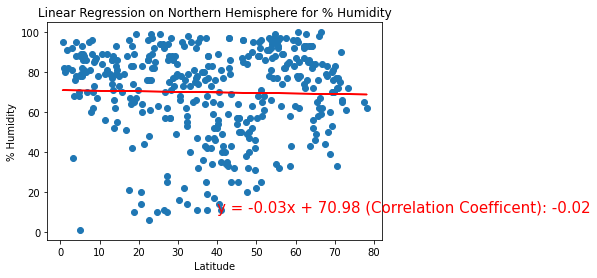

In [172]:
# Linear Regression on the Northern Hemisphere (Humidity). 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function. 
plot_linear_regression(x_values,y_values, "Linear Regression on Northern Hemisphere \
for % Humidity","% Humidity", (40,10))

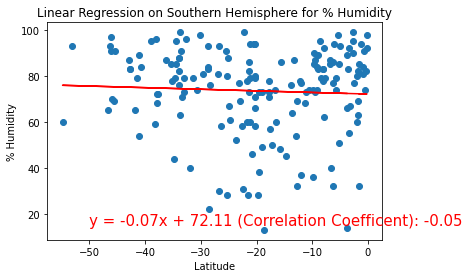

In [173]:
# Linear Regression on the Southern Hemisphere (Humidity). 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function. 
plot_linear_regression(x_values,y_values, "Linear Regression on Southern Hemisphere \
for % Humidity","% Humidity", (-50,15))

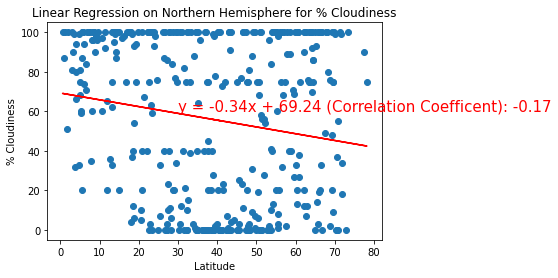

In [174]:
# Linear Regression on the Northern Hemisphere (Cloudiness). 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function. 
plot_linear_regression(x_values,y_values, "Linear Regression on Northern Hemisphere \
for % Cloudiness","% Cloudiness", (30,60))

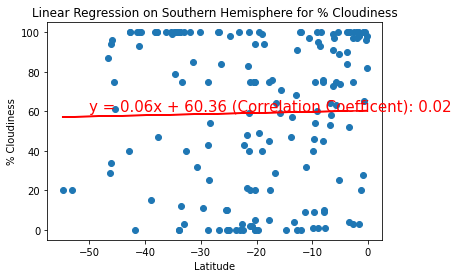

In [175]:
# Linear Regression on the Southern Hemisphere (Cloudiness). 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function. 
plot_linear_regression(x_values,y_values, "Linear Regression on Southern Hemisphere \
for % Cloudiness","% Cloudiness", (-50,60))

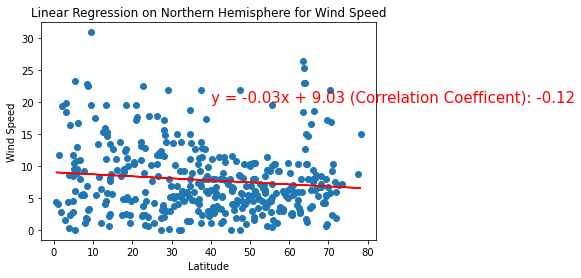

In [176]:
# Linear Regression on the Northern Hemisphere (Wind Speed). 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function. 
plot_linear_regression(x_values,y_values, "Linear Regression on Northern Hemisphere \
for Wind Speed","Wind Speed", (40,20))

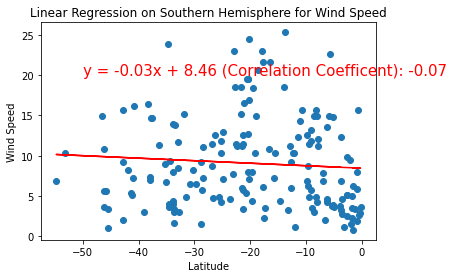

In [177]:
# Linear Regression on the Southern Hemisphere (Wind Speed). 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function. 
plot_linear_regression(x_values,y_values, "Linear Regression on Southern Hemisphere \
for Wind Speed","Wind Speed", (-50,20))